**Outliers Identification Using Statistical Method**

Z-scores




In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from collections import Counter

%matplotlib inline
# the matplotlib inline magic command is used to enable display of matplotlib plots
# directly within the notebook,rather than in a separate window

In [3]:
df_raw=pd.read_csv('creditcard.csv')
df=df_raw.drop(['Time'],axis=1)

In [7]:
feature_list = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
                'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
                'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
# This list contains the names of features (columns) to be used in the dataset.

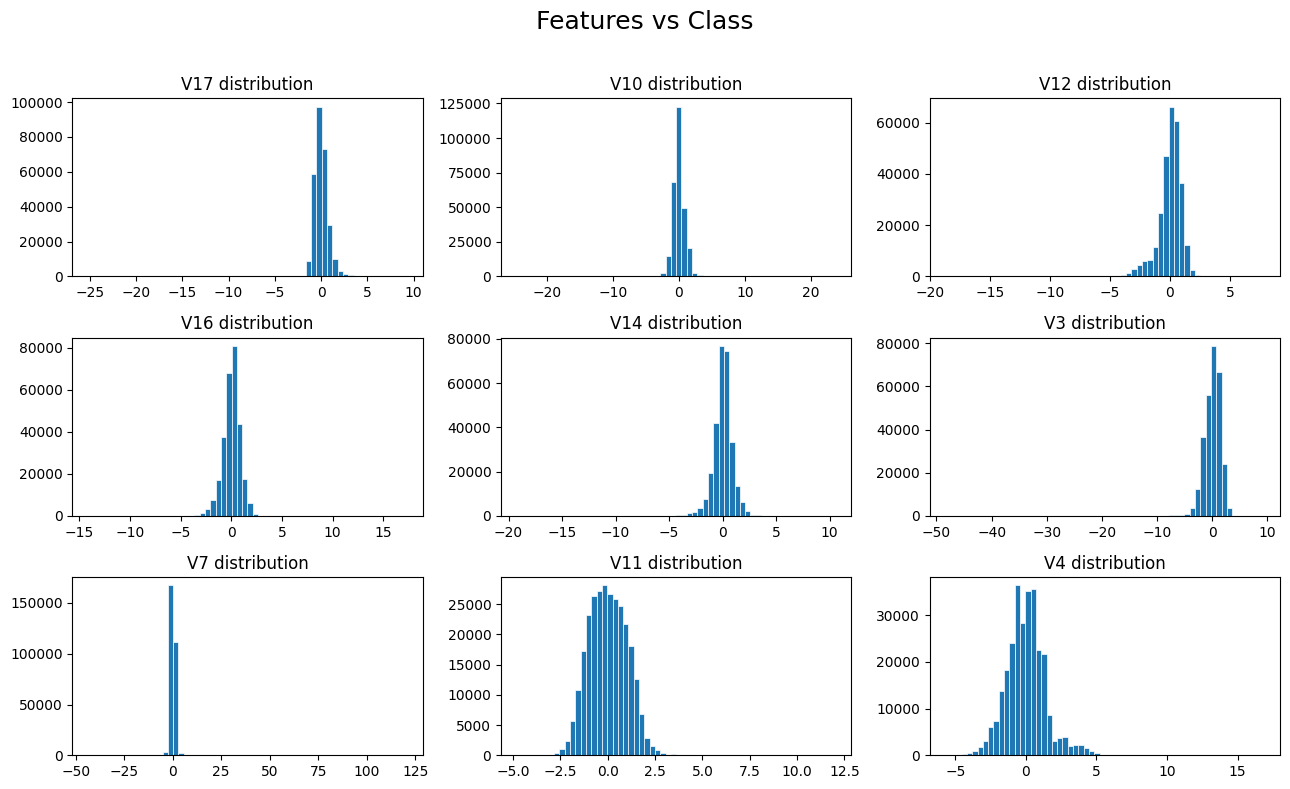

In [10]:
# The code creates a 3x3 grid of histograms to visualize the distribution of 9 specific features (V17, V10, ...).

fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(13,8))
# 3 rows , 3 columns => 9 subplots

fig.suptitle('Features vs Class\n',size=18)
axes[0,0].hist(df['V17'],bins=60,linewidth=0.5,edgecolor='white')
axes[0,0].set_title('V17 distribution')
# hist:Histogram

axes[0,1].hist(df['V10'],bins=60,linewidth=0.5,edgecolor='white')
axes[0,1].set_title('V10 distribution')

axes[0,2].hist(df['V12'],bins=60,linewidth=0.5,edgecolor='white')
axes[0,2].set_title('V12 distribution')

axes[1,0].hist(df['V16'],bins=60,linewidth=0.5,edgecolor='white')
axes[1,0].set_title('V16 distribution')

axes[1,1].hist(df['V14'],bins=60,linewidth=0.5,edgecolor='white')
axes[1,1].set_title('V14 distribution')

axes[1,2].hist(df['V3'],bins=60,linewidth=0.5,edgecolor='white')
axes[1,2].set_title('V3 distribution')

axes[2,0].hist(df['V7'],bins=60,linewidth=0.5,edgecolor='white')
axes[2,0].set_title('V7 distribution')

axes[2,1].hist(df['V11'],bins=60,linewidth=0.5,edgecolor='white')
axes[2,1].set_title('V11 distribution')

axes[2,2].hist(df['V4'],bins=60,linewidth=0.5,edgecolor='white')
axes[2,2].set_title('V4 distribution')

plt.tight_layout()
# ensures proper spacing between the subplots for better readability

Detecting Outliers Using Z-Score


In [13]:
def z_score_method(df,n,features):
  """
  This code uses the z-score method to identify rows (observations) that are considered outliers in the dataset.
  It removes rows with a large number of outliers (more than n).
  The primary goal is to clean the data from outliers for more accurate analysis.
  """
  outlier_list=[] # List to store all detected outlier indices

  for column in features:
    # Calculate mean and standard deviation for the current column
    data_mean=df[column].mean()
    data_std=df[column].std()
    threshold=3 # Define the z-score threshold for outliers

    # Calculate z-score for each observation in the column
    z_score=abs(0.6745*(df[column]-data_mean)/data_std)
    """
    Scaler
    Z=(X-μ)/σ
    df[column]=>Pandas Series
    """

    # Get indices of rows where z-score exceeds the threshold
    outlier_list_column=df[z_score > threshold].index
    """
    We note that we put in the condition (z_score > threshold)
    But we were not included in the condition (z_score < -threshold)
    The reason is the use of abs
    """

   # Add these indices to the overall outlier list
    outlier_list.extend(outlier_list_column)

  # Count how many times each index appears in the outlier list
  outlier_list=Counter(outlier_list)

  # Select indices of rows with more than n outliers
  multiple_outliers=list(k for k,v in outlier_list.items() if v > n)

  # Calculate the number of outlier records
  df1=df[z_score > threshold]
  print('Total number of outliers is : ',df1.shape[0])

  return multiple_outliers # Return indices of rows with excessive outliers

# Detecting outliers using the z-score method
outliers_z_score=z_score_method(df,1,feature_list)

# Remove rows identified as outliers and reset the index
df_out_2=df.drop(outliers_z_score,axis=0).reset_index(drop=True)


Total number of outliers is :  2100


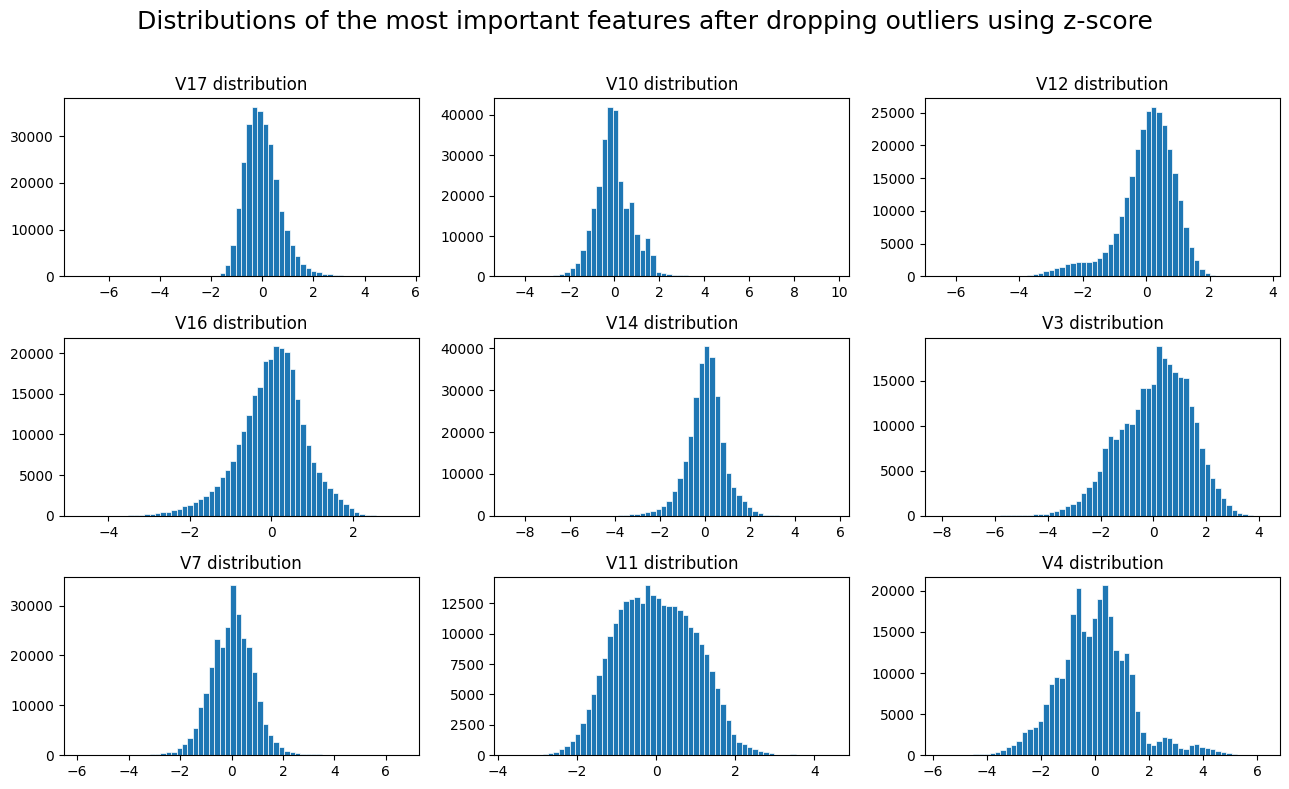

In [12]:
# Checking distributions of the most important features after dropping outliers
"""
The main goal of the code is to visualize the distributions of the most important features
after removing outliers using the z-score method
to ensure data cleanliness and assess the impact of outlier removal on feature distributions.
 """
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(13,8))
fig.suptitle('Distributions of the most important features after dropping outliers using z-score\n',size=18)

axes[0,0].hist(df_out_2['V17'],bins=60,linewidth=0.5,edgecolor='white')
axes[0,0].set_title('V17 distribution')

axes[0,1].hist(df_out_2['V10'],bins=60,linewidth=0.5,edgecolor='white')
axes[0,1].set_title('V10 distribution')

axes[0,2].hist(df_out_2['V12'],bins=60,linewidth=0.5,edgecolor='white')
axes[0,2].set_title('V12 distribution')

axes[1,0].hist(df_out_2['V16'],bins=60,linewidth=0.5,edgecolor='white')
axes[1,0].set_title('V16 distribution')

axes[1,1].hist(df_out_2['V14'],bins=60,linewidth=0.5,edgecolor='white')
axes[1,1].set_title('V14 distribution')

axes[1,2].hist(df_out_2['V3'],bins=60,linewidth=0.5,edgecolor='white')
axes[1,2].set_title('V3 distribution')

axes[2,0].hist(df_out_2['V7'],bins=60,linewidth=0.5,edgecolor='white')
axes[2,0].set_title('V7 distribution')

axes[2,1].hist(df_out_2['V11'],bins=60,linewidth=0.5,edgecolor='white')
axes[2,1].set_title('V11 distribution')

axes[2,2].hist(df_out_2['V4'],bins=60,linewidth=0.5,edgecolor='white')
axes[2,2].set_title('V4 distribution')

# Adjust the layout to avoid overlap between subplots
plt.tight_layout()

Note :
V10 => x-axis range before dropping outliers (-20..20)
v10 => x-axis range after dropping outliers using z-score method (-4..10)

The idea is that we reduced the range, We notice that the y-axis has also shrunk

 V11 it looks like a normal distribution after using z-score